In [ ]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

np.random.seed(929)
n_points = 500
xs = np.random.random(n_points)
ys = np.random.random(n_points)

area = (max(xs) - min(xs)) * (max(ys) - min(ys))

d = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        d[i,j] = np.sqrt((xs[i] - xs[j])**2 + (ys[i]-ys[j])**2)

#print(d)

radius = 0.1

r = d < 2*radius
r = r.astype(float)
r = r - np.identity(n_points)

print(np.sum(r))
plt.plot(xs, ys, '.r')



In [5]:
area*0.74/np.pi/radius**2

23.376385489304134

In [18]:
def max_points_with_rejection(r):
    n_points = r.shape[0]
    x = cp.Variable(n_points, boolean=True )
    N = n_points*300 # anything >> len(x)
    weights = np.random.randn(n_points)*1e-3 + 1
    prob = cp.Problem(cp.Maximize(weights@x),
                     [
                        (np.identity(n_points) + r / N) @ x <= 1,
                        cp.sum(x) <= area*0.74/np.pi/radius**2 # help cutting down soln in branch and bound
                     ])
    print(prob.solve(solver='CBC'))
    return x.value

x = max_points_with_rejection(r)

21.007574197361894


In [67]:
def max_points_with_rejection(r):
    n_points = r.shape[0]
    x = cp.Variable(n_points, boolean=True )
    N = n_points*300 # anything >> len(x)
    weights = np.random.randn(n_points)*1e-3 + 1
    prob = cp.Problem(cp.Maximize(1),
                     [
                        (np.identity(n_points) + r / N) @ x <= 1,
                        #cp.sum(x) <= area*0.74/np.pi/radius**2 # help cutting down soln in branch and bound,
                        cp.sum(x) == 20
                     ])
    print(prob.solve(solver='SCIP'))
    return x.value

x = max_points_with_rejection(r)
print(x)

1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [5]:

def max_points_with_rejection_ortools(r):
    
    n_points = r.shape[0]
    x = cp.Variable(n_points, boolean=True )
    N = n_points*300 # anything >> len(x)
    weights = np.random.randn(n_points)*1e-3 + 1
    prob = cp.Problem(cp.Maximize(1),
                     [
                        (np.identity(n_points) + r / N) @ x <= 1,
                        #cp.sum(x) <= area*0.74/np.pi/radius**2 # help cutting down soln in branch and bound,
                        cp.sum(x) == 22
                     ])
    print(prob.solve(solver='CBC'))
    return x.value

In [20]:
from ortools.linear_solver import pywraplp as pw
solver = pw.Solver.CreateSolver('SCIP')
n_points = r.shape[0]
xvar = [solver.BoolVar(f'x[{i}]') for i in range(n_points)]
N = n_points*300
a = np.identity(n_points) + r / N
for j in range(n_points):
    solver.Add( sum([c*x for c,x in zip(a[j], xvar)]) <= 1)
#solver.Add(sum(xvar) == 22)
solver.Maximize(sum(xvar))


In [ ]:
solver.Solve()


In [15]:
pw.Solver.OPTIMAL

0

In [16]:
sol = np.array([x.solution_value() for x in xvar])
print(sum(sol))
print(sol)

21.0
[ 0. -0.  1. -0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1. -0.
 -0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1. -0.  1.  1.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0. -0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  1.
  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.]


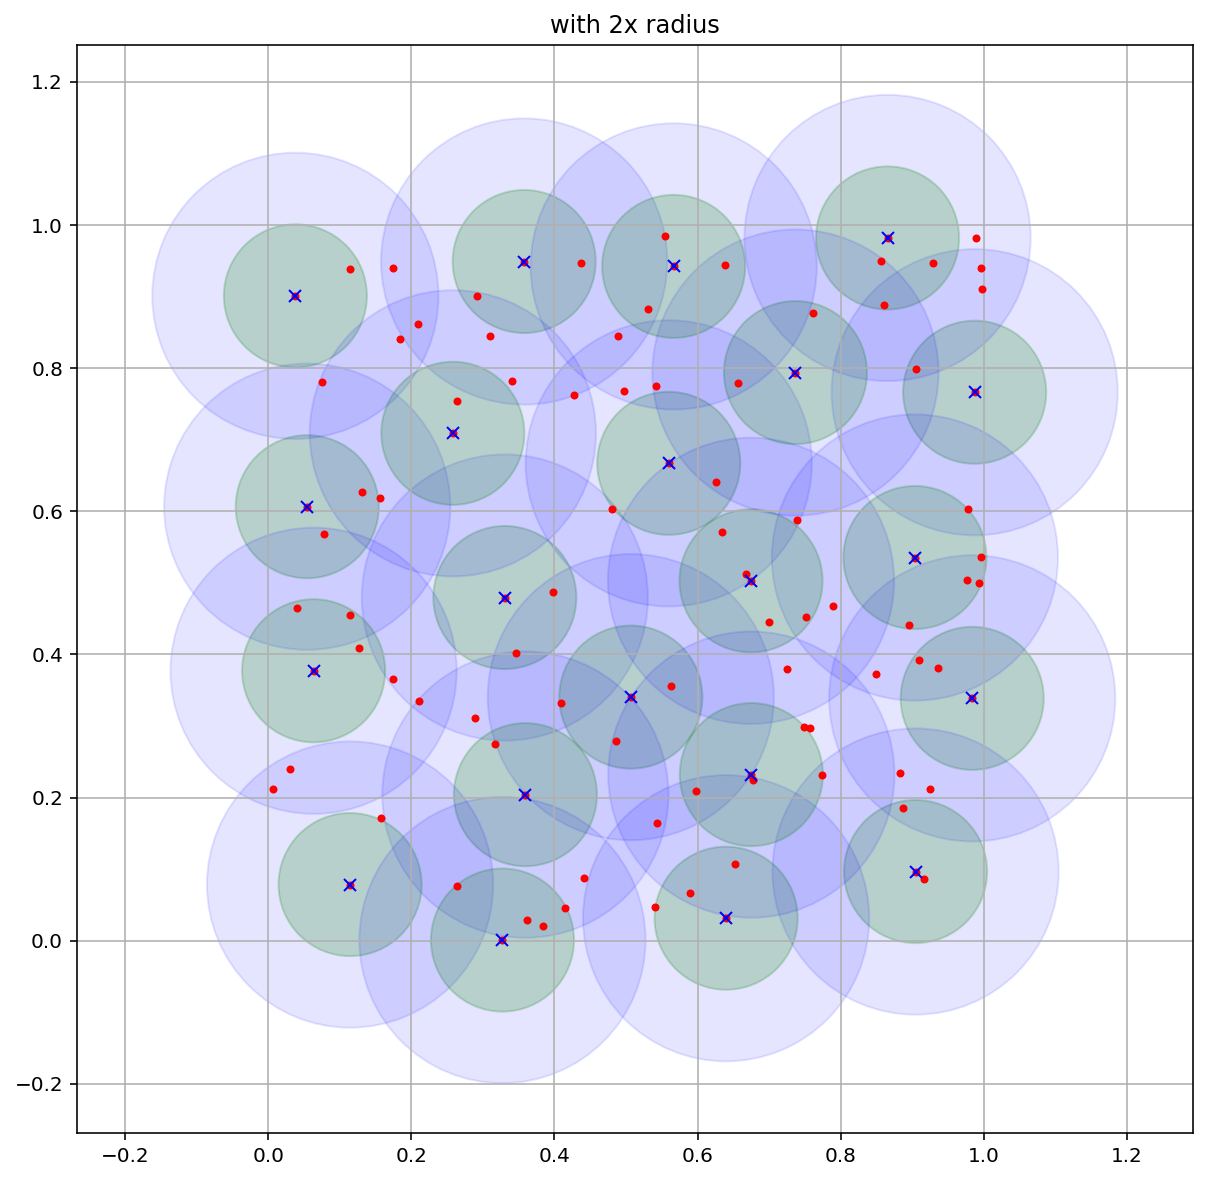

In [17]:
x=sol
#print(x)
plt.figure(figsize=(10,10))
plt.plot(xs, ys, '.r')
for i, v in enumerate(x):
    if v > 0.5:
        plt.plot(xs[i], ys[i], 'xb')
        circle = plt.Circle((xs[i], ys[i]), radius*2, alpha=0.1, color='blue')
        plt.gca().add_patch(circle)
        circle = plt.Circle((xs[i], ys[i]), radius, alpha=0.2, color='green')
        plt.gca().add_patch(circle)
       
        plt.title('with 2x radius')
plt.axis('equal')
plt.grid()

In [ ]:
#make 2r cover everyone -> max min (distance between all pairs)?

In [ ]:
# greedy approach

def greedy(A):